<a href="https://colab.research.google.com/github/EricXu1728/GoogleAIReader/blob/main/Task_1_Vector_Accuracy_Gemini_Pro_Reader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip -q install google-generativeai==0.3.0
!pip -q install google-ai-generativelanguage==0.4.0
!pip install PyGithub
!pip install pylev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.9/145.9 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_md

2023-12-28 15:35:20.455008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-28 15:35:20.455098: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-28 15:35:20.457508: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-28 15:35:20.470790: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-28 15:35:22.301986: W tensorflow/compiler/tf2

In [ ]:
'''
import requests

def download_file_from_github(repo_owner, repo_name, file_path, branch='master'):
    base_url = f'https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{branch}/{file_path}'
    response = requests.get(base_url)

    if response.status_code == 200:
        # File found, save it to your local directory or process it as needed
        with open(file_path.split("/")[-1], 'wb') as file:
            file.write(response.content)
        print(f"File '{file_path}' downloaded successfully.")
    else:
        print(f"Failed to download file '{file_path}'. Status code: {response.status_code}")

# Example usage:
repo_owner = 'onwuegbuchulem'
repo_name = 'WEB_SCRAPING_THUMBNAILS'


file_name = "1"

file_path = f'Thumbnail_mapped/Thumbnail256_mapped/01/{file_name}.jpg'

download_file_from_github(repo_owner, repo_name, file_path)

file_path = f'Documents/txt/01/{file_name}.txt'
download_file_from_github(repo_owner, repo_name, file_path)
'''


'\nimport requests\n\ndef download_file_from_github(repo_owner, repo_name, file_path, branch=\'master\'):\n    base_url = f\'https://raw.githubusercontent.com/{repo_owner}/{repo_name}/{branch}/{file_path}\'\n    response = requests.get(base_url)\n\n    if response.status_code == 200:\n        # File found, save it to your local directory or process it as needed\n        with open(file_path.split("/")[-1], \'wb\') as file:\n            file.write(response.content)\n        print(f"File \'{file_path}\' downloaded successfully.")\n    else:\n        print(f"Failed to download file \'{file_path}\'. Status code: {response.status_code}")\n\n# Example usage:\nrepo_owner = \'onwuegbuchulem\'\nrepo_name = \'WEB_SCRAPING_THUMBNAILS\'\n\n\nfile_name = "1"\n\nfile_path = f\'Thumbnail_mapped/Thumbnail256_mapped/01/{file_name}.jpg\'\n\ndownload_file_from_github(repo_owner, repo_name, file_path)\n\nfile_path = f\'Documents/txt/01/{file_name}.txt\'\ndownload_file_from_github(repo_owner, repo_name, fil

## Configuring the Model

In [ ]:
# setup
import google.generativeai as genai
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown

GOOGLE_AI_STUDIO = userdata.get('GOOGLE_AI_STUDIO2')

genai.configure(api_key=GOOGLE_AI_STUDIO)

In [ ]:
for m in genai.list_models():
    print(m.name)
    print(m.supported_generation_methods)


models/chat-bison-001
['generateMessage', 'countMessageTokens']
models/text-bison-001
['generateText', 'countTextTokens', 'createTunedTextModel']
models/embedding-gecko-001
['embedText', 'countTextTokens']
models/gemini-pro
['generateContent', 'countTokens']
models/gemini-pro-vision
['generateContent', 'countTokens']
models/embedding-001
['embedContent', 'countTextTokens']
models/aqa
['generateAnswer']


In [ ]:

# Set up the model
generation_config = {
  "temperature": 0.,
  "top_p": 1,
  "top_k": 1,
  "max_output_tokens": 2048,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_ONLY_HIGH"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_ONLY_HIGH"
  }
]


model = genai.GenerativeModel(model_name="gemini-pro-vision",
                              generation_config=generation_config,
                              safety_settings=safety_settings)


## Using Gemini Pro Vision

In [ ]:
def get_text(file_name):
  file_path = f"{file_name}.txt"
  with open(file_path, 'r') as file:

      # Read the contents of the file and save it in a variable
      return file.read()




In [ ]:
import os
import PIL.Image

def get_image(name):
  if(os.path.exists(f"{name}.png")):
    print(name)
    return PIL.Image.open(f'{name}.png')
  if(os.path.exists(f"{name}.jpg")):
    return PIL.Image.open(f'{name}.jpg')

  print("error occured")

In [ ]:
import spacy
# Load the spaCy model with pre-trained word vectors
nlp = spacy.load("en_core_web_md")

def calculate_vector_accuracy(true_text, text):
  doc1 = nlp(true_text)
  doc2 = nlp(text)
  return doc1.similarity(doc2)


sentence1 = "The quick brown fox jumps over the lazy dog."
sentence2 = "A fast brown fox leaps over a sleepy canine."

print(calculate_vector_accuracy(sentence1, sentence2))

0.7671564505194697


In [ ]:
def calculate_word_accuracy_words(ground_truth, recognized_text):
    # Split the ground truth and recognized text into lists of words
    ground_truth_words = ground_truth.split()
    recognized_words = recognized_text.split()

    # Find the intersection of the two lists to get correctly recognized words
    correct_words = set(ground_truth_words) & set(recognized_words)

    # Calculate Word Accuracy
    word_accuracy = len(correct_words) / len(set(ground_truth_words))

    return word_accuracy

# Example usage
ground_truth_text = "the quick brown fox jumps over the lazy dog"
recognized_text = "the quick brown fox jumps over the lazy"

accuracy = calculate_word_accuracy_words(ground_truth_text, recognized_text)
print(f"Word Accuracy: {accuracy:.2f}%")


Word Accuracy: 0.88%


In [ ]:
import pylev
def calculate_word_accuracy_distance(ground_truth, recognized_text):
  ground_truth_words = ground_truth.split()
  recognized_words = recognized_text.split()
  distance =  pylev.levenshtein(ground_truth_words,recognized_words)

  max_string_length = max(len(ground_truth_words), len(recognized_words))
  return 1-(distance/max_string_length)


# Example usage
ground_truth_text = "the quick brown fox jumps over the lazy dog"
recognized_text = "quick the brown fox jumps over the lazy dog the the"

accuracy = calculate_word_accuracy_distance(ground_truth_text, recognized_text)
print(f"Word Accuracty: {accuracy:.2f}")

Word Accuracty: 0.64


In [ ]:
def calculate_word_accuracy_distance_characters(ground_truth, recognized_text):
  distance =  pylev.levenshtein(ground_truth,recognized_text)

  max_string_length = max(len(ground_truth), len(recognized_text))
  return 1-(distance/max_string_length)


# Example usage
ground_truth_text = "the quick brown fox jumps over the lazy dog"
recognized_text = "quick the brown fox jumps over the lazy dog the the"

accuracy = calculate_word_accuracy_distance(ground_truth_text, recognized_text)
print(f"Word Penalty: {accuracy:.2f}")

Word Penalty: 0.64


In [ ]:
def resize_with_aspect_ratio(image, target_width):
    # Calculate the aspect ratio
    aspect_ratio = image.width / image.height

    # Calculate the corresponding height based on the target width
    target_height = int(target_width / aspect_ratio)

    # Resize the image while maintaining the aspect ratio
    resized_image = image.resize((target_width, target_height))

    return resized_image

In [ ]:
def test_recognition(file_name, image_width, prompt, show_result = True):
  img = get_image(file_name)

  img = resize_with_aspect_ratio(img, image_width)

  response = 0

  retries = 0
  max_retries = 5

  print("step1")
  while(response == 0 and retries<=max_retries):
    print("step2")
    try:
      response = model.generate_content([prompt, img])
      response.resolve()
    except:
      print("Error occured. Trying again")
      retries +=1

  width, height = img.size
  pixel_count = width*height

  if(show_result):
    display(img)
    #print(response.text)
  print("step2.5")
  print(response)
  print("step3")
  try:
    if response.text is None:
      print("response object is null")
    else:
      print("nothing went wrong")
  except:
    print("could not read text")
  print(response.text)
  print("step4")
  print(pixel_count)
  print("step5")
  return response.text, pixel_count




In [ ]:
def run_predictions(file_name, resolutions, prompt_list):
  text_list = []
  pixel_list = []
  for prompt in prompt_list:
    print("start: " +str(prompt))
    pixels = []
    texts = []
    for res in resolutions:

      print("working "+str(res))
      ypoint, xpoint = test_recognition(file_name,res, prompt)
      print("finish "+str(res))
      pixels.append(xpoint)
      texts.append(ypoint)

    text_list.append(texts)
    pixel_list.append(pixels)

  return pixel_list, text_list


In [ ]:
def judge_predictions(true_text, text_list):
  distance_accuracy_list = []
  char_distance_accuracy_list = []
  word_accuracy_list = []

  for texts in text_list:
    distance_accuracy = []
    char_distance_accuracy = []
    word_accuracy = []
    for text in texts:
      distance_accuracy.append(calculate_word_accuracy_distance(true_text, text))
      char_distance_accuracy.append(calculate_word_accuracy_distance_characters(true_text, text))
      word_accuracy.append(calculate_vector_accuracy(true_text, text))
    distance_accuracy_list.append(distance_accuracy)
    char_distance_accuracy_list.append(char_distance_accuracy)
    word_accuracy_list.append(word_accuracy)

  return distance_accuracy_list, char_distance_accuracy_list, word_accuracy_list


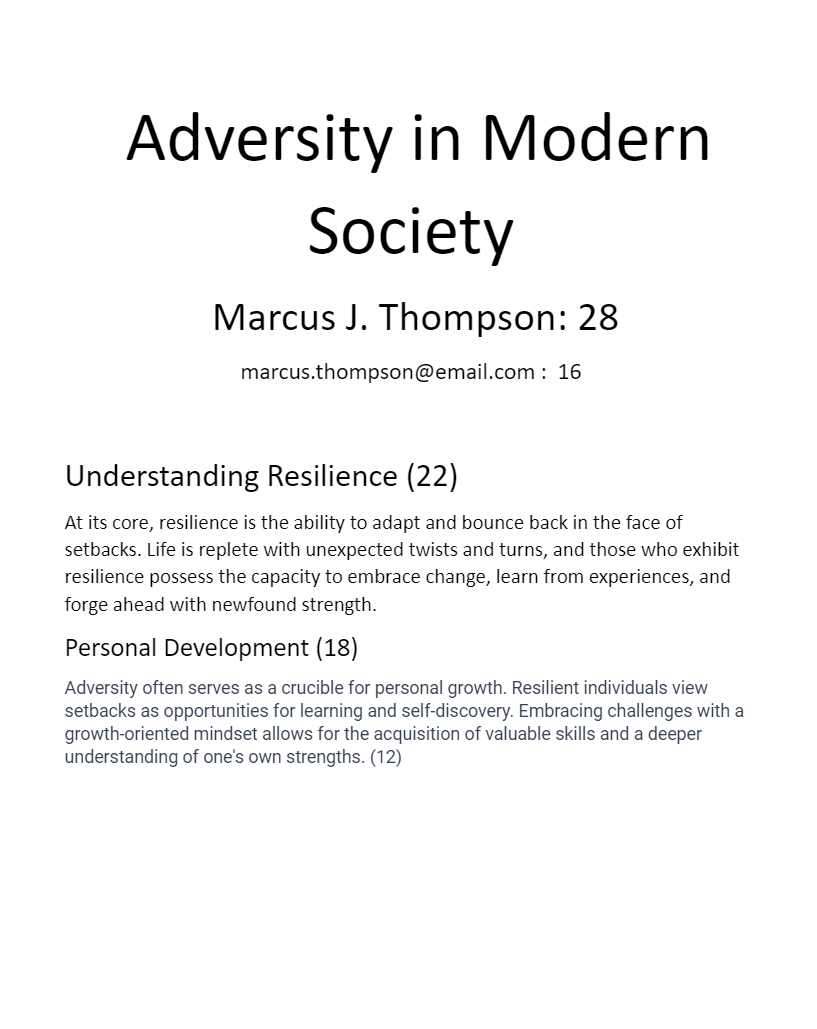

 Adversity in Modern Society
Marcus J. Thompson: 28
marcus.thompson@email.com: 16

Understanding Resilience (22)
At its core, resilience is the ability to adapt and bounce back in the face of setbacks. Life is replete with unexpected twists and turns, and those who exhibit resilience possess the capacity to embrace change, learn from experiences, and forge ahead with newfound strength.

Personal Development (18)
Adversity often serves as a crucible for personal growth. Resilient individuals view setbacks as opportunities for learning and self-discovery. Embracing challenges with a growth-oriented mindset allows for the acquisition of valuable skills and a deeper understanding of one's own strengths. (12)


In [ ]:
from PIL import Image
img =  Image.open("/content/drive/MyDrive/thumbnails/adversity.png")
display(img)
response = model.generate_content(["You are provided with an extremely compressed snapshot of the first page of a Word document. Your goal is to identify and return all the words present in the image. If there are any gaps or areas where the text is not recognizable, you should fill in those gaps with predicted words. Analyze the compressed image and identify all the words that are visible. If there are any regions where the text is not recognizable, generate and fill in those gaps with predicted words based on context. Return all of the text, including those predicted in the gaps. Respond in plain text.", img])
response.resolve()
print(response.text)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def draw_and_run_predictions(file_name_list, sizes, prompts, return_text = False):

  # Now, the variable file_content contains the content of the text file
  file_content = get_text(file_name)
  print(file_content)
  img = get_image(file_name)
  display(img)

  print("working")

  pixel_list, text_list = run_predictions(file_name, sizes, prompts)


  true_text = get_text(file_name)

  if (return_text):
    return text_list, true_text
  else:

    distance_accuracy_list, char_distance_accuracy_list, word_accuracy_list = judge_predictions(true_text, text_list)


    data_list = []
    catagories = []
    for i in range(len(sizes)):
      catagories += ["Character Distance Accuracy: Size "+str(i+1), "Word Distance Accuracy: Size "+str(i+1), "Word Accuracy: Size "+str(i+1)]

    i = 0
    for i in range(len(prompts)):
      data = []
      for j in range (len(sizes)):
        data.append(char_distance_accuracy_list[i][j])
        data.append(distance_accuracy_list[i][j])
        data.append(word_accuracy_list[i][j])
      data_list.append(data)
      pass




    return catagories, data_list


In [ ]:
def add_2d_lists(list1, list2):
    # Find dimensions of the input lists
    rows1, cols1 = len(list1), len(list1[0])
    rows2, cols2 = len(list2), len(list2[0])

    # Pad smaller list with zeros if necessary
    if rows1 > rows2:
        list2 += [[0] * cols2 for _ in range(rows1 - rows2)]
    elif rows1 < rows2:
        list1 += [[0] * cols1 for _ in range(rows2 - rows1)]

    if cols1 > cols2:
        list2 = [row + [0] * (cols1 - cols2) for row in list2]
    elif cols1 < cols2:
        list1 = [row + [0] * (cols2 - cols1) for row in list1]

    # Add corresponding elements
    result = [[list1[i][j] + list2[i][j] for j in range(cols1)] for i in range(rows1)]

    return result

In [ ]:
def divide_2d_array(matrix, divisor):
    # Use nested list comprehension to divide each element by the divisor
    result = [[element / divisor for element in row] for row in matrix]
    return result

In [ ]:
sizes = [246, 96, 48]

AI Technology
Chim adssa: 28
ericxu1728@terpmail.umd.edu :  16

Rapid Advances in Artificial Intelligence (22)
In the last decade, the field of artificial intelligence (AI) has experienced unprecedented growth and development. This surge can be attributed to the confluence of increased computational power, vast amounts of available data, and breakthroughs in machine learning algorithms. As a result, AI applications have permeated various aspects of our daily lives, from virtual assistants and recommendation systems to autonomous vehicles and advanced medical diagnostics.
The Rise of Sustainable Technologies (18)
As concerns about climate change and environmental sustainability intensify, the global focus has shifted towards developing and implementing green technologies. Innovations in renewable energy, energy storage, and sustainable materials are becoming increasingly crucial in the quest for a more eco-friendly future. Solar and wind power technologies, once considered niche, have n

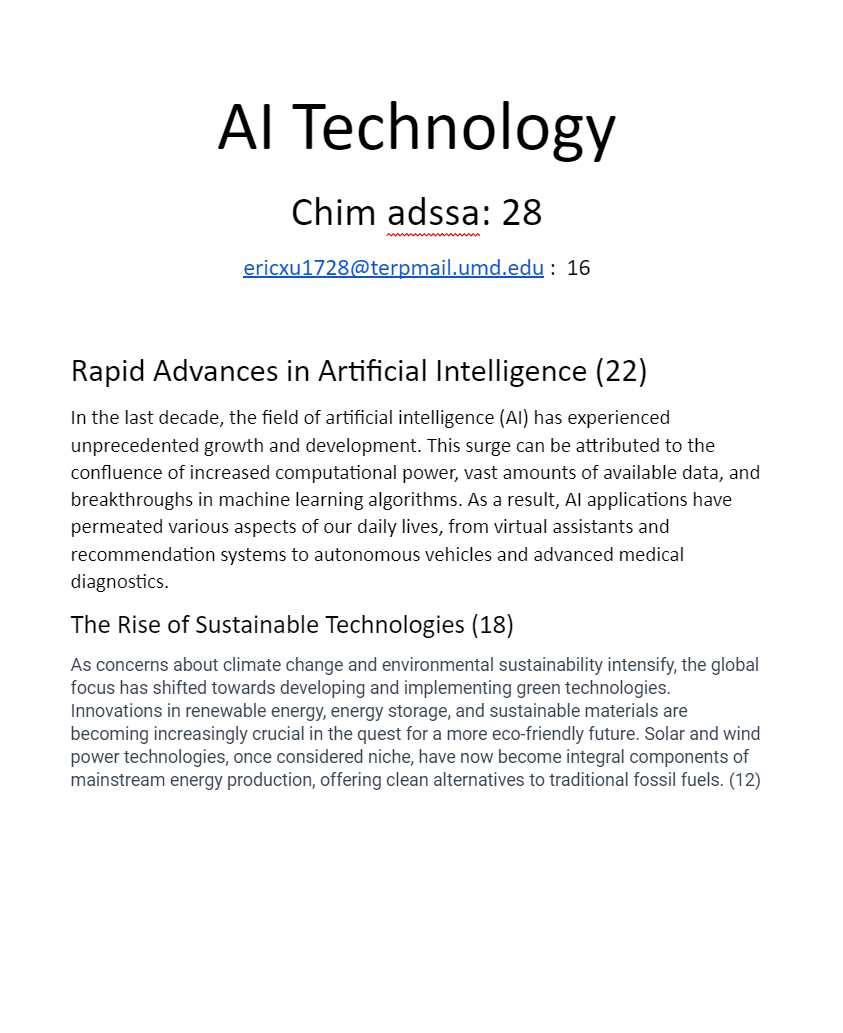

working
start: Identify all the text in this blurry image:
working 246
/content/drive/MyDrive/thumbnails/technology
step1
step2


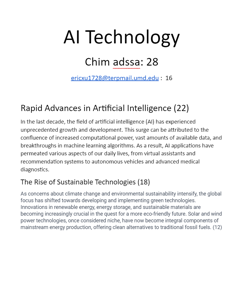

step2.5
step3
nothing went wrong
 **AI Technology**
Chim adssa: 28
ericput272@hotmail.um.edu.my: 16

**Rapid Advances in Artificial Intelligence (22)**
In the last decade, the field of artificial intelligence (AI) has experienced unprecedented growth and development. This surge can be attributed to the confluence of increased computational power, vast amounts of available data, and breakthroughs in machine-learning algorithms. As a result, applications have permeated various aspects of our daily lives, from assistants and recommendation systems to autonomous vehicles and advanced medical diagnostics.

**The Rise of Sustainable Technologies (18)**
As concerns about climate change and environmental sustainability intensify, the global focus has shifted towards developing and implementing green technologies. Solar and wind power technologies, once considered niche, have become increasingly crucial in the quest for a more eco-friendly future. Moreover, advancements in energy storage and di

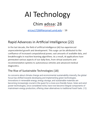

step2.5
step3
nothing went wrong
 AI Technology
Colm ahern - 28
www.siliconrepublic.com

Rapid Advances in Artificial Intelligence (23)
Recent years have seen artificial intelligence (AI) make huge strides forward, with rapid advancements in the field leading to a new wave of technological innovation. From driverless cars to facial recognition software, AI is already having a major impact on our lives, and it is only set to become more prevalent in the years to come.

The Rise of Sustainable Technologies (18)
The increasing focus on sustainability is driving the development of new technologies that are designed to reduce our impact on the environment. From renewable energy sources to electric vehicles, these technologies are helping us to create a more sustainable future.
step4
11232
step5
finish 96
working 48
/content/drive/MyDrive/thumbnails/technology
step1
step2


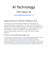

step2.5
step3
nothing went wrong
 AI Technology

Recent Advances in AI Technology

Artificial intelligence (AI) is a field of computer science that focuses on developing intelligent machines that can perform tasks normally requiring human intelligence. Some of the most common applications of AI include:

Natural language processing (NLP): This involves the ability of a machine to understand and generate human language.
Computer vision: This involves the ability of a machine to interpret and understand visual information.
Robotics: This involves the ability of a machine to perform physical tasks.
Machine learning: This involves the ability of a machine to learn from data and improve its performance over time.
AI technology is rapidly evolving, and new applications are being developed all the time. As AI technology continues to advance, it is likely to have a major impact on our lives.

Here are some of the ways that AI technology could change our lives in the future:

AI could help us t

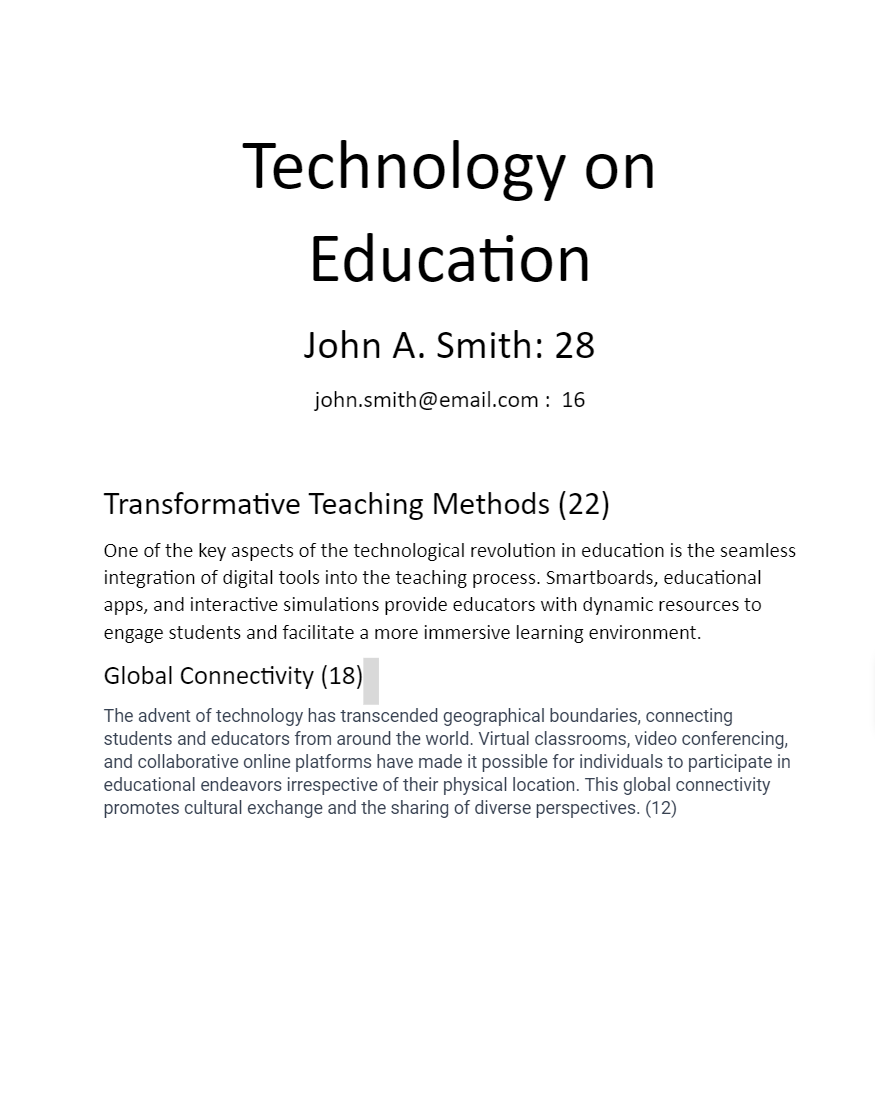

working
start: Identify all the text in this blurry image:
working 246
/content/drive/MyDrive/thumbnails/education
step1
step2


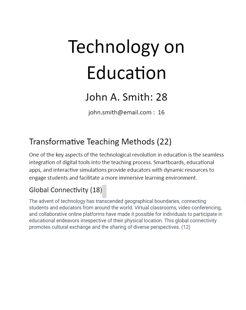

step2.5
step3
nothing went wrong
 Technology on Education

John A. Smith: 28
john.smith@email.com: '16

Transformative Teaching Methods (22)
One of the key aspects of the technological revolution is the seamless integration of digital tools into the teaching process. Smartboards, educational apps, and interactive simulations provide education with dynamic resources to engage students and facilitate a more immersive learning environment.

Global Connectivity (18)
The advent of technology has transcended geographical boundaries, connecting students and teachers from around the world. Virtual classrooms, video conferencing, and collaborative online platforms have made it possible for individuals to participate in educational exchanges irrespective of their physical locations. This promotes cultural exchange and the sharing of diverse perspectives. (12)
step4
76260
step5
finish 246
working 96
/content/drive/MyDrive/thumbnails/education
step1
step2


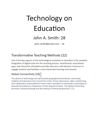

step2.5
step3
nothing went wrong
 Technology on Education

John A. Smith 28

Transformative Teaching Methods (123)

Many people believe that the use of technology in education is a positive development. They argue that technology can help to improve student engagement, learning outcomes, and access to education. Others, however, are more skeptical about the benefits of technology in education. They worry that technology can be distracting, and that it can lead to students becoming more passive learners.

There is no doubt that technology has the potential to be a powerful tool for education. However, it is important to use technology in a way that is effective and engaging. Simply putting technology in the classroom is not enough. Teachers need to be trained in how to use technology effectively, and they need to be able to create lessons that are engaging and relevant to students.

When used effectively, technology can help to improve student engagement, learning outcomes, and access t

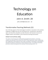

step2.5
step3
nothing went wrong
 Technology in Action

Saving Lives

Two area hospitals are using new technology to perform delicate brain surgery.
step4
2880
step5
finish 48

Creativity in Everyday Life
Daniel M. Turner: 28
 daniel.turner@email.com :  16

Creativity in Personal Expression (22)
Art, in its various forms, serves as a powerful medium for personal expression and creativity. Whether through painting, writing, music, or dance, individuals find a unique outlet to convey emotions, thoughts, and perspectives. Engaging in artistic endeavors fosters a sense of self-discovery and allows for the celebration of individuality.
Nurturing Creativity in Education (18)
Education plays a pivotal role in nurturing creativity, with educators serving as catalysts for the development of curious minds. Encouraging students to question, explore, and think critically fosters a foundation for creative thinking. Curiosity is the spark that ignites the flames of innovation and original thought.. 

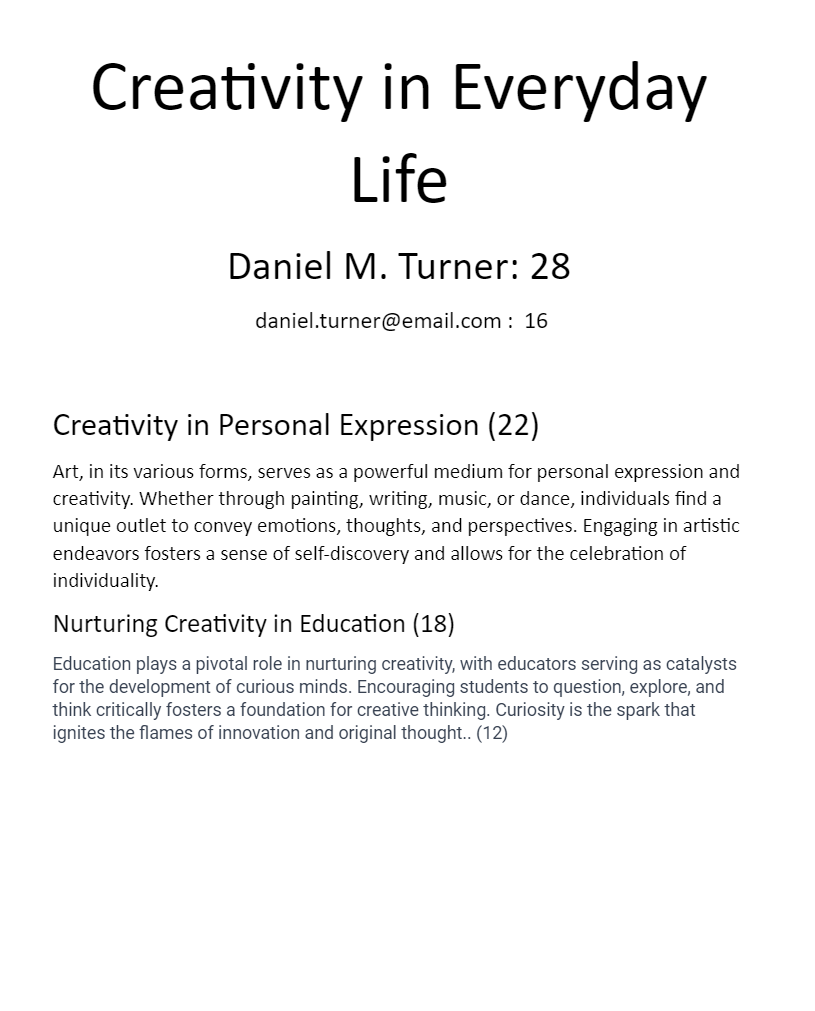

working
start: Identify all the text in this blurry image:
working 246
/content/drive/MyDrive/thumbnails/creativity
step1
step2


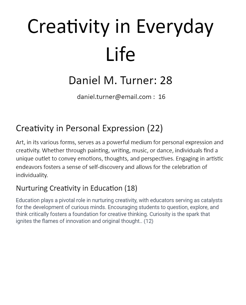

step2.5
step3
nothing went wrong
 Creativity in Everyday Life

Daniel M. Turner: 28

daniel.turner@email.com: 16

Creativity in Personal Expression (22)

Art, in its various forms, serves as a powerful medium for personal expression and creativity. Whether through painting, writing, music, or dance, individuals find a unique outlet to convey emotions, thoughts, and perspectives. Engaging in artistic endeavors fosters a sense of self-discovery and allows for the celebration of individuality.

Nurturing Creativity in Education (18)

Education plays a pivotal role in nurturing creativity, with educators serving as catalysts for the development of creative minds. Encouraging students to question, explore, and think critically fosters a foundation for creative thinking. Curiosity is the spark that ignites the flames of innovation and original thought.
step4
75030
step5
finish 246
working 96
/content/drive/MyDrive/thumbnails/creativity
step1
step2


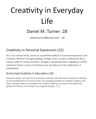

step2.5
step3
nothing went wrong
 Creativity in Everyday Life

Daniel M. Snyder · 2018
sagecreativity.com · 3-18

Creativity in Personal Expression (PE)
We all have the capacity to be creative, and we all use creativity in our everyday lives. When we express ourselves creatively, we are able to communicate our thoughts, feelings, and ideas in a unique and personal way. This can be done through a variety of means, such as art, music, writing, dance, and drama.

Expressing ourselves creatively can have a number of benefits. It can help us to:

* Develop our sense of self and identity
* Explore our emotions and experiences
* Communicate with others
* Solve problems
* Reduce stress and anxiety
* Have fun

Fostering Creativity in PE
There are a number of things that we can do to foster creativity in our personal expression. Here are a few tips:

* Be open to new experiences. Try new things, and don't be afraid to make mistakes.
* Be patient. Creativity takes time and effort. Don't get disco

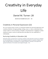

step2.5
step3
nothing went wrong
 Creativity in Everyday Life
By: 
Date: 

Creativity in Everyday Life

Creativity is the ability to produce something new and original. It is often thought of as a rare talent, but it is actually something that we all have the potential to develop. Creativity is important in all aspects of our lives, from our personal relationships to our professional careers.

There are many different ways to be creative. Some people are naturally creative, while others have to learn how to develop their creativity. There are many things that you can do to boost your creativity, such as:

* **Taking risks.** Creativity often involves trying new things and taking risks. Don't be afraid to experiment and try new things. The more you try, the more likely you are to come up with something new and original.
* **Being open to new experiences.** Creativity is often sparked by new experiences. Try new things, meet new people, and go new places. The more you expose yourself to 

In [ ]:
file_name = "/content/drive/MyDrive/thumbnails/technology"

final_data_list = []

catagories, data_list = draw_and_run_predictions(file_name, sizes, ["Identify all the text in this blurry image:"])
final_data_list = data_list

file_name = "/content/drive/MyDrive/thumbnails/education"
catagories, data_list = draw_and_run_predictions(file_name, sizes, ["Identify all the text in this blurry image:"])
final_data_list = add_2d_lists(final_data_list, data_list)

file_name = "/content/drive/MyDrive/thumbnails/creativity"
catagories, data_list  = draw_and_run_predictions(file_name,sizes, ["Identify all the text in this blurry image:"])
final_data_list = add_2d_lists(final_data_list, data_list)




 Adversity in Modern Society
 Marcus J. Thompson: 28
marcus.thompson@email.com :  16

Understanding Resilience (22)
At its core, resilience is the ability to adapt and bounce back in the face of setbacks. Life is replete with unexpected twists and turns, and those who exhibit resilience possess the capacity to embrace change, learn from experiences, and forge ahead with newfound strength.
Personal Development (18)
Adversity often serves as a crucible for personal growth. Resilient individuals view setbacks as opportunities for learning and self-discovery. Embracing challenges with a growth-oriented mindset allows for the acquisition of valuable skills and a deeper understanding of one's own strengths. (12)


/content/drive/MyDrive/thumbnails/adversity


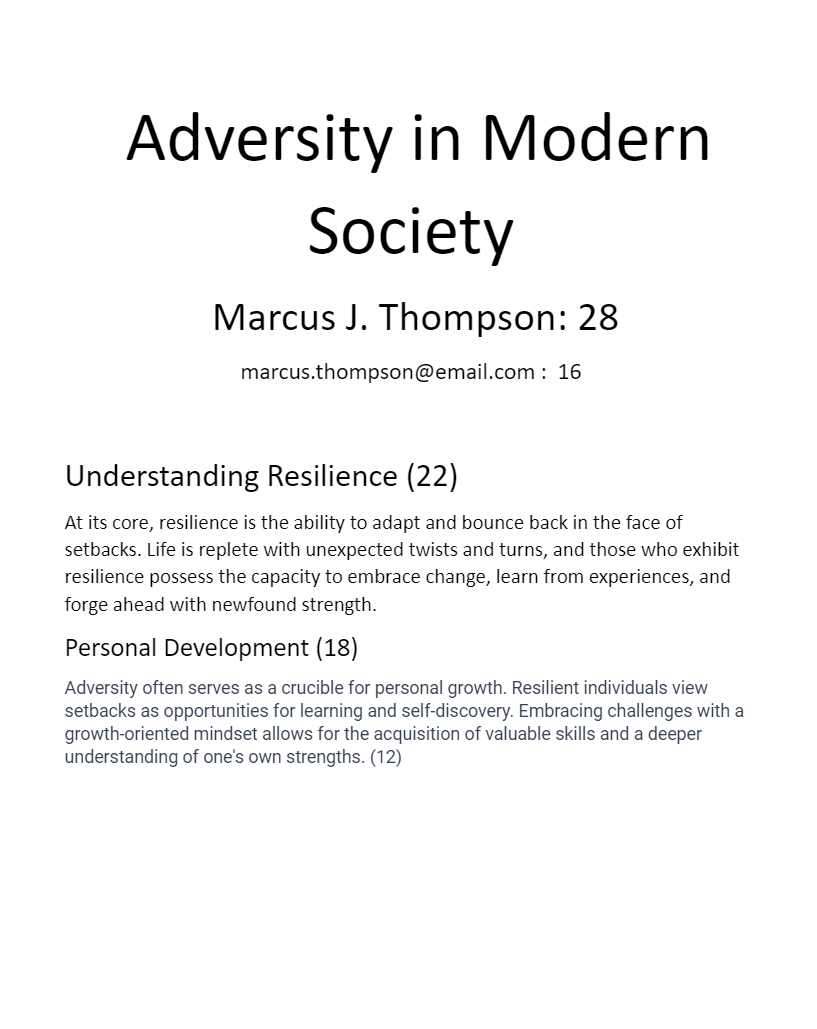

working
start: Identify all the text in this blurry image:
working 246
/content/drive/MyDrive/thumbnails/adversity
step1
step2


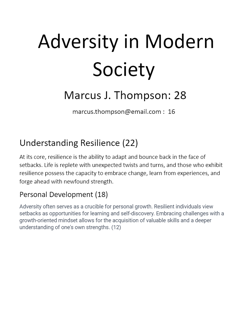

step2.5
step3
nothing went wrong
 Adversity in Modern Society
Marcus J. Thompson: 28
marcus.thompson@email.com: 16

Understanding Resilience (22)
At its core, resilience is the ability to adapt and bounce back in the face of setbacks. Life is replete with unexpected twists and turns, and those who exhibit resilience possess the capacity to embrace change, learn from experiences, and forge ahead with newfound strength.

Personal Development (18)
Adversity often serves as a crucible for personal growth. Resilient individuals view setbacks as opportunities for learning and self-discovery. Embracing challenges with a growth-oriented mindset allows for the acquisition of valuable skills and a deeper understanding of one's own strengths. (12)
step4
76014
step5
finish 246
working 96
/content/drive/MyDrive/thumbnails/adversity
step1
step2


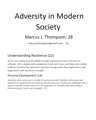

step2.5
step3
nothing went wrong
 Adversity in Modern Society
Marcus A. Thompson 28
Understanding Resilience (225)
Human beings are remarkably resilient creatures. We have the ability to adapt to and overcome a wide range of challenges, from natural disasters to personal tragedies. In this chapter, we will explore the concept of resilience and how it can help us to understand and cope with adversity.
What is Resilience? (225)
Resilience is the ability to bounce back from adversity. It is the capacity to cope with stress, adapt to change, and recover from setbacks. Resilient people are not immune to adversity, but they are able to weather the storms of life and come out stronger on the other side.
step4
11520
step5
finish 96
working 48
/content/drive/MyDrive/thumbnails/adversity
step1
step2


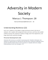

step2.5
step3
nothing went wrong
 Adversity in Modernism
Modern Library
No. 4
step4
2880
step5
finish 48


In [ ]:


file_name = "/content/drive/MyDrive/thumbnails/adversity"
catagories, data_list = draw_and_run_predictions(file_name, sizes, ["Identify all the text in this blurry image:"])
final_data_list = add_2d_lists(final_data_list, data_list)


Climate Change Awareness
Olivia K. Henderson: 28
daniel.turner@email.com :  16

Conscious Consumerism (22)
Climate change awareness has given rise to a new era of conscious consumerism, with individuals increasingly seeking products and services that align with environmentally sustainable practices. From eco-friendly packaging to energy-efficient appliances, consumers are making choices that reflect a commitment to reducing their ecological footprint.
The Role of Information and Education (18)
The dissemination of information through various channels, including social media, documentaries, and educational campaigns, has played a pivotal role in raising climate change awareness. Access to information empowers consumers to make informed choices and hold businesses accountable for their environmental impact. (12)
/content/drive/MyDrive/thumbnails/climb


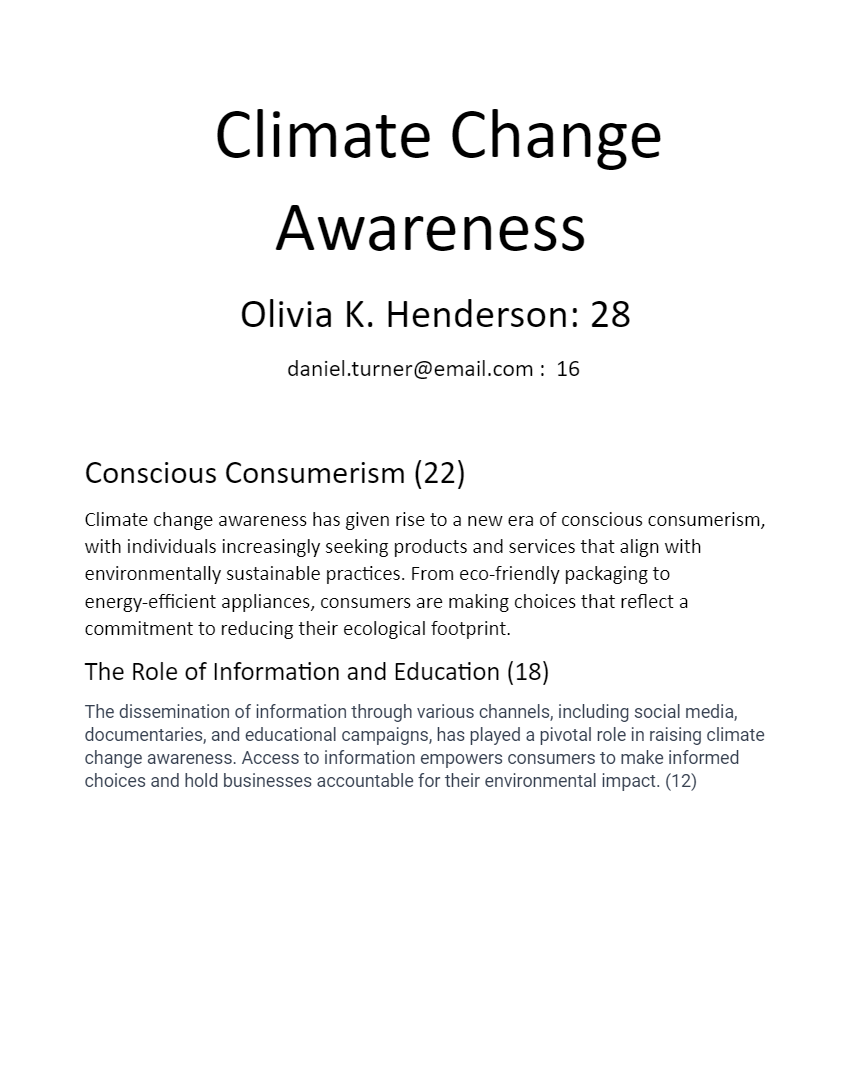

working
start: Identify all the text in this blurry image:
working 246
/content/drive/MyDrive/thumbnails/climb
step1
step2


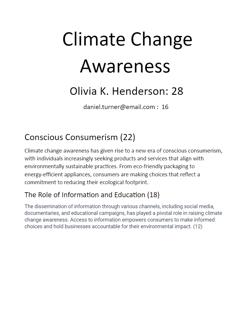

step2.5
step3
nothing went wrong
 Climate Change Awareness

Olivia K. Henderson: 28
daniel.turner@email.com: 16

Conscious Consumerism (22)
Climate change awareness has given rise to a new era of conscious consumerism, with individuals increasingly seeking products and services that align with environmentally sustainable practices. From eco-friendly packaging to energy-efficient appliances, consumers are making choices that reflect a commitment to reducing their ecological footprint.

The Role of Information and Education (18)
The dissemination of information through various channels, including social media, documentaries, and educational campaigns, has played a pivotal role in raising climate change awareness. Access to information empowers individuals to make informed choices and hold businesses accountable for their environmental impact. (12)
step4
76260
step5
finish 246
working 96
/content/drive/MyDrive/thumbnails/climb
step1
step2


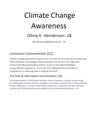

step2.5
step3
nothing went wrong
 Climate Change Awareness
Olivia R. Henderson, 28
Conscious Documentary (222)
Climate change awareness has become a global concern as more and more people are becoming aware of the effects of climate change on the environment. This has led to an increase in the number of people taking action to reduce their carbon footprint and become more environmentally friendly.
One of the most important things that people can do to raise awareness about climate change is to educate themselves on the issue. This can be done by reading books, articles, and watching documentaries about climate change. It is also important to stay up-to-date on the latest news and research on climate change.
Another important way to raise awareness about climate change is to talk about it with others. This can be done with friends, family, co-workers, and even strangers. It is important to share information about climate change and to encourage others to take action to reduce their carb

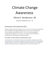

step2.5
step3
nothing went wrong
 Climate Change
Assessment

Intergovernmental Panel on Climate Change
step4
2880
step5
finish 48


In [ ]:

file_name = "/content/drive/MyDrive/thumbnails/climb"
catagories, data_list = draw_and_run_predictions(file_name, sizes, ["Identify all the text in this blurry image:"])
final_data_list = add_2d_lists(final_data_list, data_list)


In [ ]:
final_data_list = divide_2d_array(final_data_list,5)

In [ ]:
def draw_data_simple(catagories, data_list, prompts):
  prompt_count = len(prompts)
  # Set up figure and axis
  fig, ax = plt.subplots()

  # Bar width
  bar_width = 0.2

  # Set positions for the bars
  bar_positions = np.arange(len(catagories))


  new_data = []
  size = 3

  repeats = int(len(data_list[0]) / size)

  print(repeats)
  for i in range(repeats):

    data = []

    for j in range(size):

      data.append(data_list[0][j*size + i])

    new_data.append(data)


  print(new_data)

  for i in range(prompt_count):
    # Plot the bars with transparency

    ax.bar(bar_positions+(i/8), new_data[i], width=bar_width, label=prompts[i], alpha=0.95, zorder = i*10)


  # Set labels and title
  ax.set_xlabel('Thumbnail resolution sizes')
  ax.set_ylabel('Accuracy')
  ax.set_title('Accuracy over sizes')
  ax.set_xticks(bar_positions)
  ax.set_xticklabels(catagories, rotation = 90)
  ax.legend()
  # Show the plot
  plt.show()
  pass

[[0.9426887063666023, 0.9095128606728426, 0.9959907128280262, 0.30264612212252806, 0.10856668711934223, 0.8721109149370365, 0.15723587334447556, 0.045141716864695904, 0.7470286513481608]]
3
[[0.9426887063666023, 0.30264612212252806, 0.15723587334447556], [0.9095128606728426, 0.10856668711934223, 0.045141716864695904], [0.9959907128280262, 0.8721109149370365, 0.7470286513481608]]


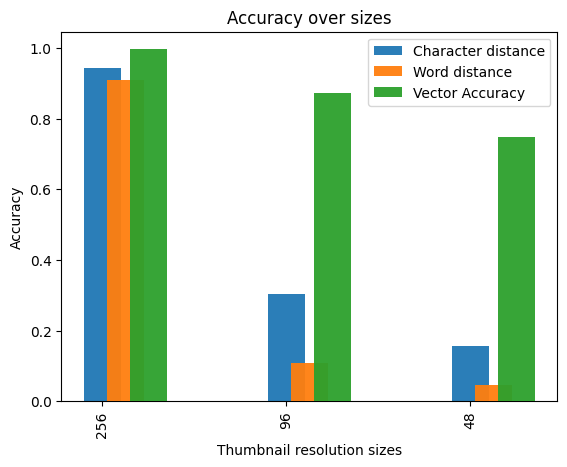

In [ ]:

new_cat = ["Character distance", "Word distance", "Word Accuracy"]
print(final_data_list)
draw_data_simple(["256", "96", "48"], final_data_list, ["Character distance", "Word distance", "Vector Accuracy"])